Recurrent Neural Networks (RNNs) are a class of neural networks specifically designed to handle sequential data such as time series, natural language, or audio. Unlike traditional feed forward neural networks, RNNs have loops in their architecture, allowing information to persist and be reused across different time steps. This makes them especially powerful for tasks where the current input is dependent on previous inputs.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# Load the IMDB dataset
vocab_size = 10000
max_length = 200

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let observe the dataset

In [3]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3

# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()  #'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007....

# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)   #34704: 'fawn', 52009: 'tsukino', 52010: 'nunnery'....

# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"

decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])
print(decoded_sequence)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [OOV] is an amazing actor and now the same being director [OOV] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [OOV] and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [OOV] to the two little boy's that played the [OOV] of norman and paul they were just brilliant children are often left out of the [OOV] list i think because the stars that play them all grown up are such a big profile for the whole film but these c

In [4]:
# Pad sequences
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

In [5]:
# Define the RNN model using LSTM
model = keras.Sequential([
    # Add an embedding layer to convert input sequences into dense vectors of fixed size
    keras.layers.Embedding(vocab_size, 32, input_length=max_length),
    # Add an LSTM layer with 128 units to capture long-term dependencies
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(32),
    # Add a fully connected layer with 1 neuron and sigmoid activation for binary classification
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.7140 - loss: 0.5262 - val_accuracy: 0.8327 - val_loss: 0.3791
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8960 - loss: 0.2684 - val_accuracy: 0.8494 - val_loss: 0.3654
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9302 - loss: 0.1885 - val_accuracy: 0.8632 - val_loss: 0.3263
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9503 - loss: 0.1429 - val_accuracy: 0.8598 - val_loss: 0.4469
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9612 - loss: 0.1091 - val_accuracy: 0.8364 - val_loss: 0.4496
782/782 - 4s - 6ms/step - accuracy: 0.8364 - loss: 0.4496

Test accuracy: 0.8363999724388123


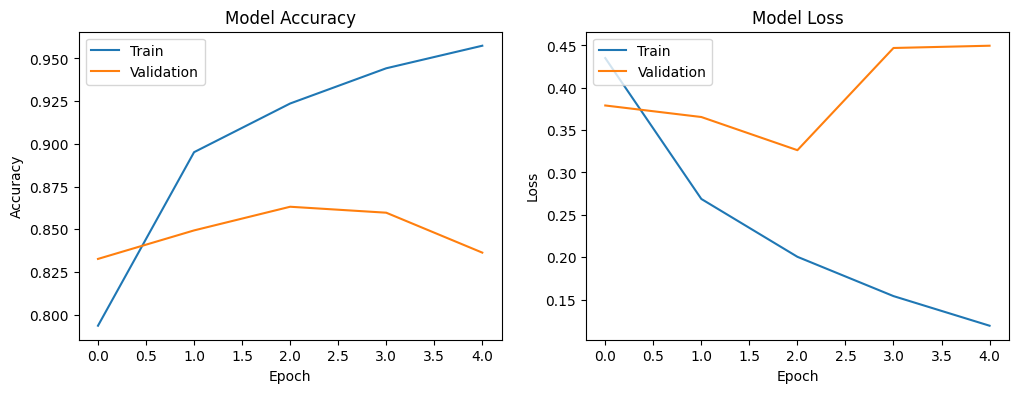

In [7]:
# Visualizing Training Results

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)                                   # Create subplot for accuracy
plt.plot(history.history['accuracy'])                  # Plot training accuracy
plt.plot(history.history['val_accuracy'])              # Plot validation accuracy
plt.title('Model Accuracy')                            # Title of the plot
plt.ylabel('Accuracy')                                 # Y-axis label
plt.xlabel('Epoch')                                    # X-axis label
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend

# Plot training & validation loss values
plt.subplot(1, 2, 2)                                   # Create subplot for loss
plt.plot(history.history['loss'])                      # Plot training loss
plt.plot(history.history['val_loss'])                  # Plot validation loss
plt.title('Model Loss')                                # Title of the plot
plt.ylabel('Loss')                                     # Y-axis label
plt.xlabel('Epoch')                                    # X-axis label
plt.legend(['Train', 'Validation'], loc='upper left')  # Legend

plt.show()                                             # Display the plots

In [8]:
model2 = keras.Sequential([
    keras.layers.Embedding(vocab_size, 64, input_length=max_length),
    keras.layers.GRU(64, return_sequences=True),
    keras.layers.GRU(32),
    keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.7200 - loss: 0.5230 - val_accuracy: 0.8613 - val_loss: 0.3228
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9007 - loss: 0.2501 - val_accuracy: 0.8786 - val_loss: 0.3143
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9471 - loss: 0.1486 - val_accuracy: 0.8795 - val_loss: 0.3169
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9697 - loss: 0.0913 - val_accuracy: 0.8723 - val_loss: 0.4119
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9814 - loss: 0.0552 - val_accuracy: 0.8566 - val_loss: 0.4666
782/782 - 5s - 6ms/step - accuracy: 0.8566 - loss: 0.4666

Test accuracy: 0.8566399812698364


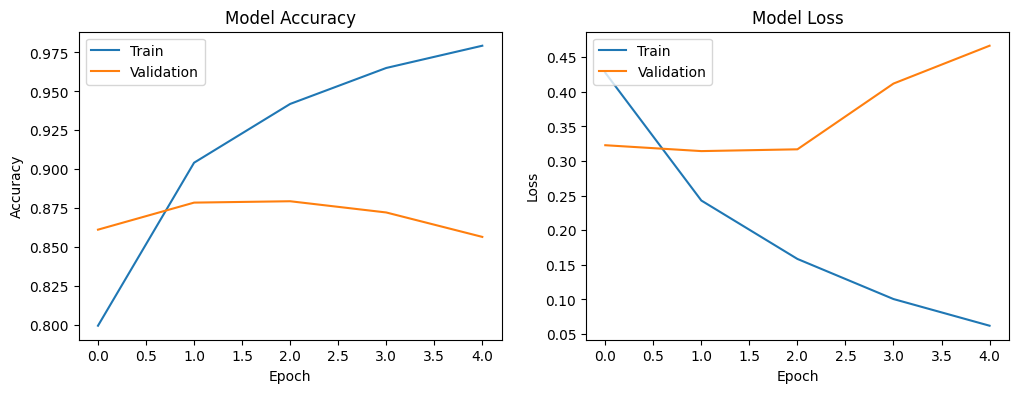

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)                                   
plt.plot(history2.history['accuracy'])                
plt.plot(history2.history['val_accuracy'])         
plt.title('Model Accuracy')                     
plt.ylabel('Accuracy')                            
plt.xlabel('Epoch')                                    
plt.legend(['Train', 'Validation'], loc='upper left') 

plt.subplot(1, 2, 2)                              
plt.plot(history2.history['loss'])                      
plt.plot(history2.history['val_loss'])               
plt.title('Model Loss')                             
plt.ylabel('Loss')                                  
plt.xlabel('Epoch')                                   
plt.legend(['Train', 'Validation'], loc='upper left')  

plt.show()                                       

In [10]:
model3 = keras.Sequential([
    keras.layers.Embedding(vocab_size, 64, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_acc = model3.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.7225 - loss: 0.5198 - val_accuracy: 0.8530 - val_loss: 0.3498
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.8825 - loss: 0.2937 - val_accuracy: 0.8654 - val_loss: 0.3349
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9235 - loss: 0.2010 - val_accuracy: 0.8660 - val_loss: 0.3609
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9481 - loss: 0.1495 - val_accuracy: 0.8580 - val_loss: 0.3684
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9645 - loss: 0.1071 - val_accuracy: 0.8600 - val_loss: 0.3605
782/782 - 5s - 6ms/step - accuracy: 0.8600 - loss: 0.3605

Test accuracy: 0.860040009021759


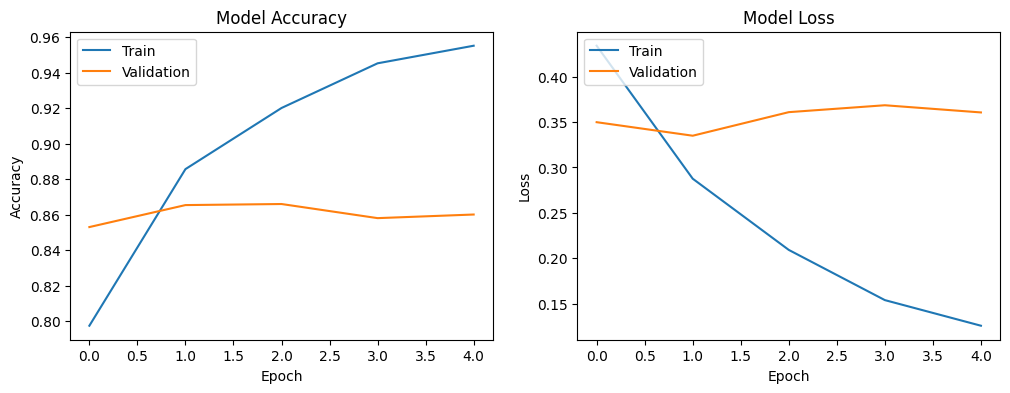

In [11]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)                                   
plt.plot(history3.history['accuracy'])                
plt.plot(history3.history['val_accuracy'])         
plt.title('Model Accuracy')                     
plt.ylabel('Accuracy')                            
plt.xlabel('Epoch')                                    
plt.legend(['Train', 'Validation'], loc='upper left') 

plt.subplot(1, 2, 2)                              
plt.plot(history3.history['loss'])                      
plt.plot(history3.history['val_loss'])               
plt.title('Model Loss')                             
plt.ylabel('Loss')                                  
plt.xlabel('Epoch')                                   
plt.legend(['Train', 'Validation'], loc='upper left')  

plt.show()                                       